<a href="https://colab.research.google.com/github/RavelPaniagua/IA-con-Python/blob/main/Red_Reuronal_Covolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

datos, metadados = tfds.load("mnist",as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.F009WS_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.F009WS_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
metadados

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

In [2]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

nombres_clases = metadados.features["label"].names

In [3]:
#Normalizacion
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes,tf.float32)
  imagenes = imagenes/255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


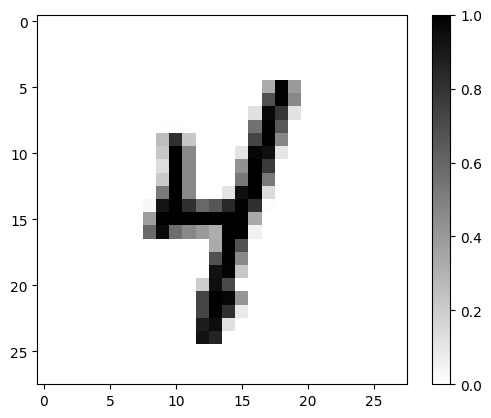

In [4]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt
#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen,cmap = plt.cm.binary)
plt.colorbar()
plt.show()

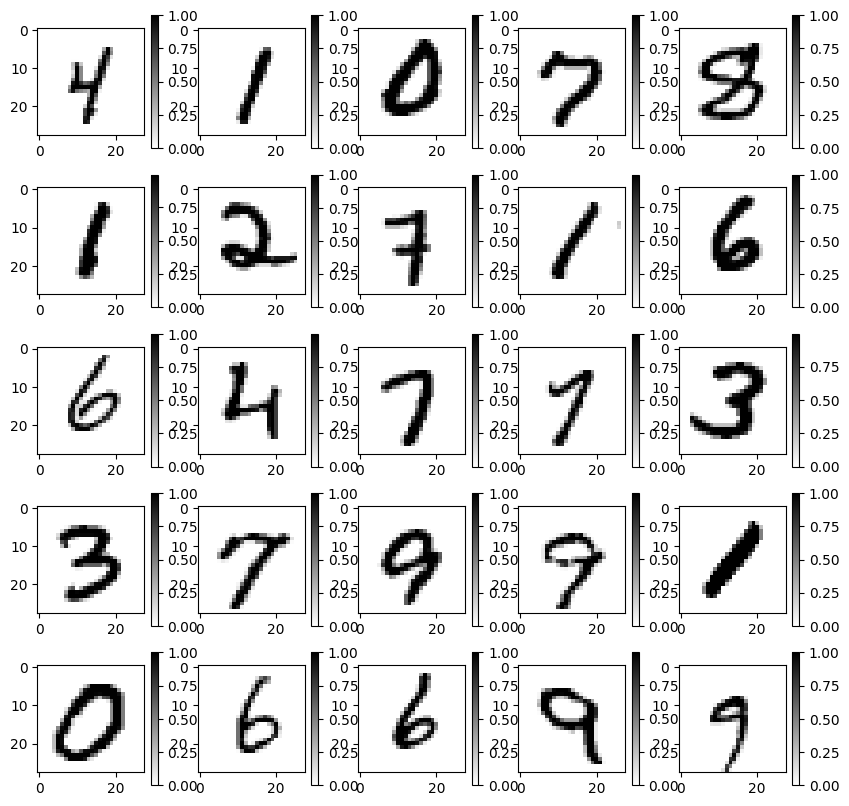

In [6]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  plt.subplot(5,5, i+1)
  plt.imshow(imagen,cmap = plt.cm.binary)
  plt.colorbar()

plt.show()





In [5]:
"""modelo = tf.keras.Sequential([
  #capa de entrada
  tf.keras.layers.Flatten(input_shape=(28,28,1)),
  # neurona o Capa oculta
  tf.keras.layers.Dense(50, activation=tf.nn.relu), # Agregando otra capa con 50 neuronas cada una para mejorar el entrenamiento
  # para lograr un mejor ajuste no necesitamos que sea forzosamente lineal y mejor aregarle una funcion de activacion
  # a nuestras neuronas (relu) es el que para numeros negativos da 0 y para positivos el mismo numero
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  #Capa de Salida
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)

  ])
"""
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), input_shape=(28,28,1),activation="relu"), #32,(3,3) -> son los filtros de aprendisaje
    tf.keras.layers.MaxPooling2D(2,2), # capa de agrupación
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nota importante a la hora de trabajar con clasificación de imagenes no es recomendable utilizar capas Densas porque esta es buena cuando se trabaja con datos en tablas pero no es buena para las imagenes. Porque esta se basa en buscar solo en lugares especificos y no como en este caso que son pixeles y estos pueden estar en cualquier lugar.

In [6]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [14]:
#COMO SON 60,000 DATOS ES BUENO SEPARARLOS POR LOTE PARA ASI NO CARGAR EL PROCESAMIENTO
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [8]:
import math
entrenamiento = modelo.fit(
    datos_entrenamiento,epochs=10,steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9013 - loss: 0.3152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9860 - loss: 0.0428
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0321
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9917 - loss: 0.0252
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0132
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9963 - loss: 0.0108
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0111
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9974 - loss: 0.0082
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9974 - loss: 0.0070


In [9]:
datos, metadatos = tfds.load("cats_vs_dogs",as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.SDAFA8_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
tfds.show_examples(datos["train"],metadatos)

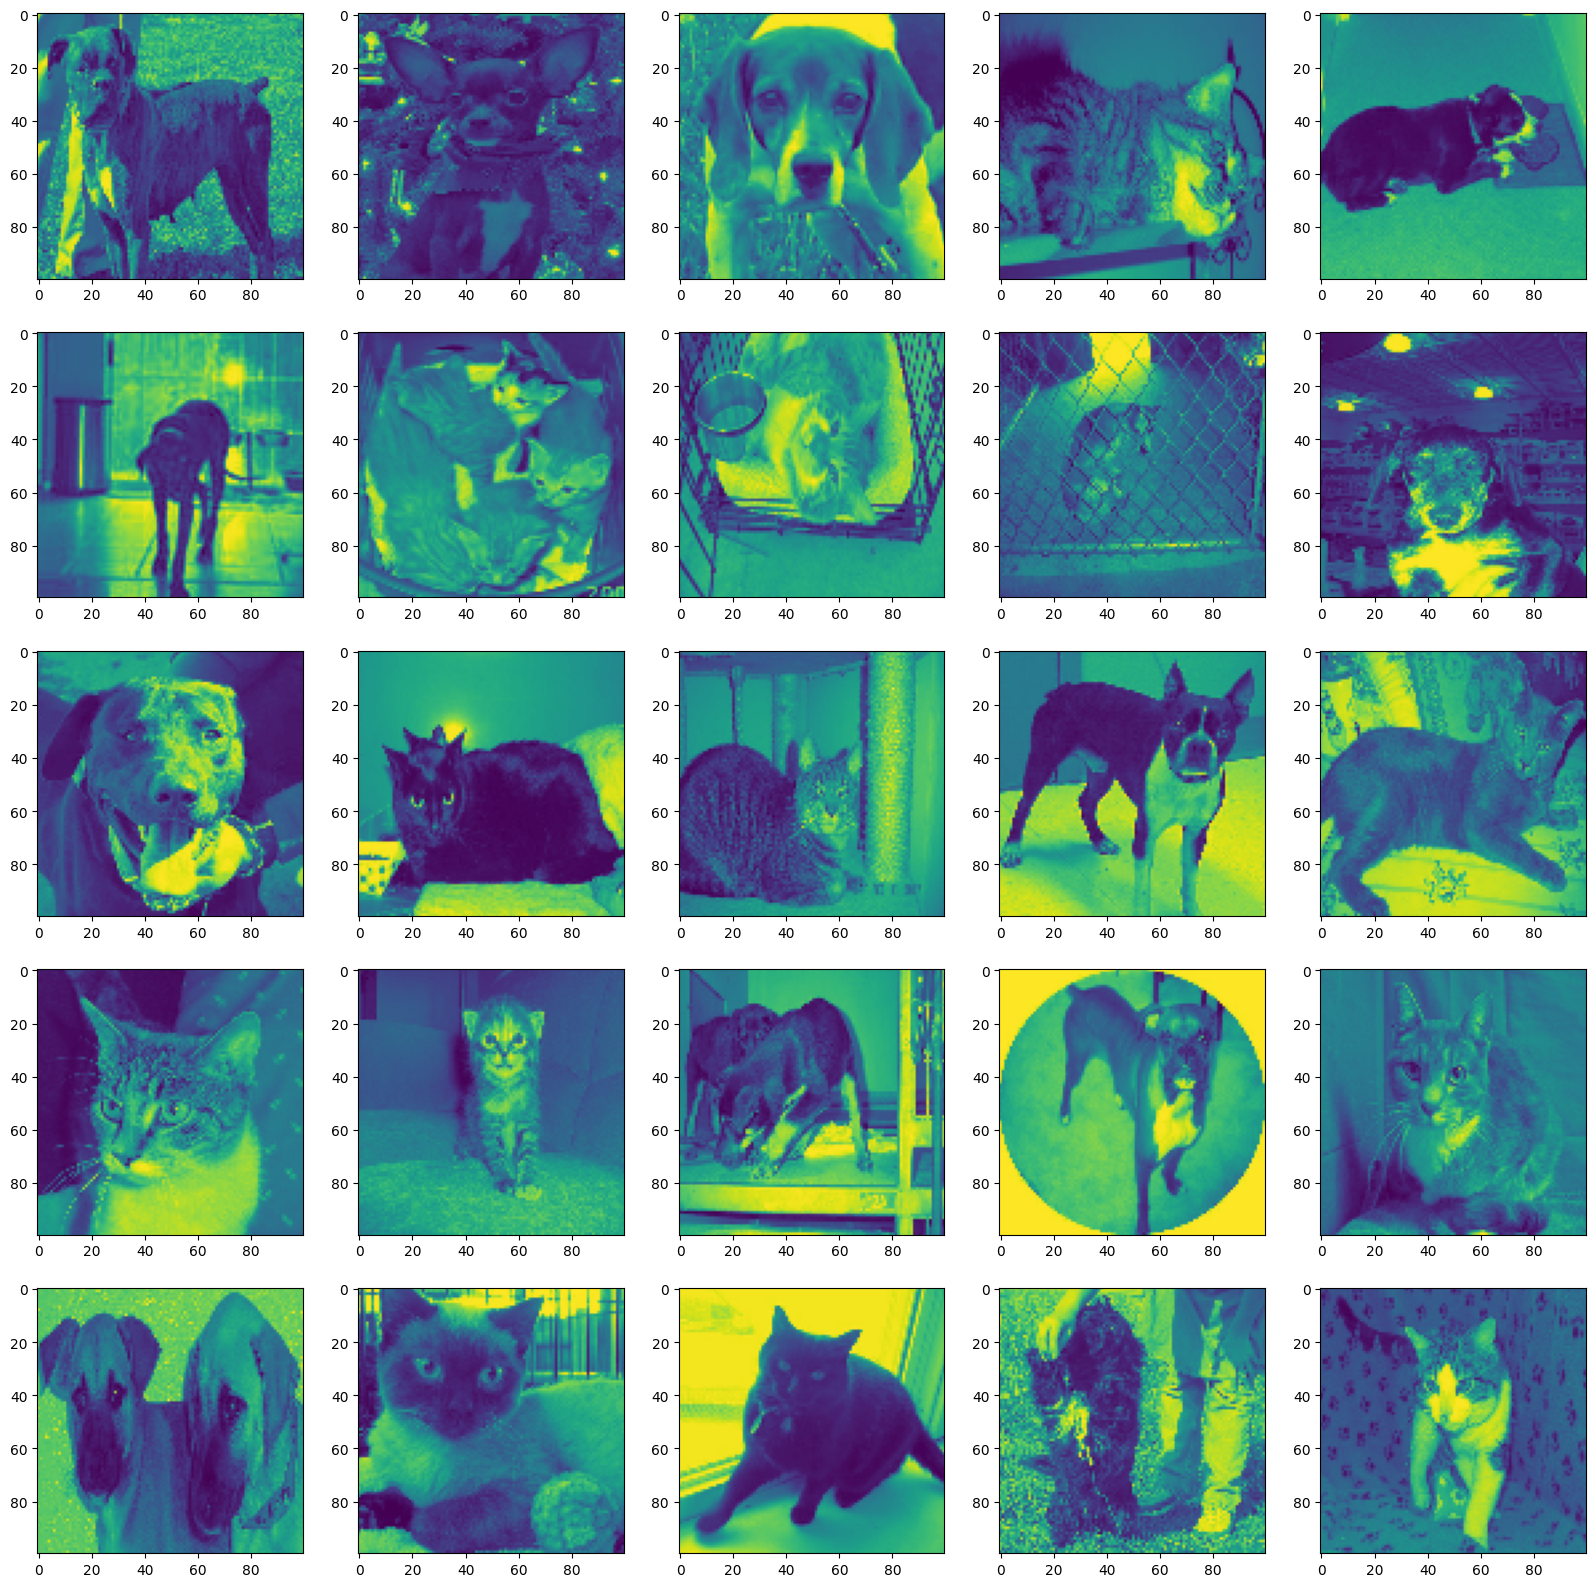

In [12]:
import matplotlib.pyplot as plt
import cv2 #opendcv - permite trabajar y hacer transformaciones en imagenes
import numpy as np

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen,etiqueta) in enumerate(datos["train"].take(25)):
  imagen = cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG))
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  plt.subplot(5,5,i+1)
  plt.imshow(imagen)

In [16]:
datos_entrenamiento = []
for i, (imagen,etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG))
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG,TAMANO_IMG,1)
  datos_entrenamiento.append([imagen,etiqueta])

In [17]:
len(datos_entrenamiento)

23262

In [18]:
# preparar las variables
X=[]
y=[]

#Separamos los datos
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [19]:
#normalizar los datos
import numpy as np
X = np.array(X).astype(float)/255.0
y = np.array(y)

In [20]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [22]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(100,100,1),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")  # para que solamente arroje 0 y 1
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [24]:
modelo.fit(
    X,y,batch_size=32, validation_split=0.15,epochs=50
)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.6125 - loss: 0.6524 - val_accuracy: 0.6762 - val_loss: 0.5883
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7584 - loss: 0.4960 - val_accuracy: 0.7762 - val_loss: 0.4603
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8081 - loss: 0.4215 - val_accuracy: 0.8163 - val_loss: 0.4069
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8470 - loss: 0.3407 - val_accuracy: 0.8132 - val_loss: 0.4132
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8774 - loss: 0.2850 - val_accuracy: 0.8481 - val_loss: 0.3658
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9029 - loss: 0.2327 - val_accuracy: 0.8347 - val_loss: 0.3940
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9330 - loss: 0.1721 - val_accuracy: 0.8390 - val_loss: 0.4292
Epoch 8/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9495 - loss: 0.1298 - val_a

In [ ]:
#Investigar entos temas:
#Sobreajute over-fitting, Dropout, Aumento de Datos